In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
getwd()
setwd("/content/drive/MyDrive/10mo semestre/ML R")
getwd()

[1] "/content"

[1] "/content/drive/MyDrive/10mo semestre/ML R"

# **Ejercicio 1**

In [ ]:
aids <- read.csv("AIDS.csv")
aids
summary(aids)

year,cases
<int>,<int>
1981,12
1982,14
1983,33
1984,50
1985,67
1986,74
1987,123
1988,141
1989,165


      year          cases      
 Min.   :1981   Min.   : 12.0  
 1st Qu.:1984   1st Qu.: 50.0  
 Median :1987   Median :123.0  
 Mean   :1987   Mean   :124.8  
 3rd Qu.:1990   3rd Qu.:204.0  
 Max.   :1993   Max.   :253.0  

**a)** Ajuste de modelo de regresion Poisson considerando terminos cuadraticos

In [ ]:
# Definiendo las variables a utilizar y ajustando un modelo glm
t <- 1:13
y <- aids$cases
modelo1 <- glm(y ~ t + I(t^2), family = poisson)
summary(modelo1)


Call:
glm(formula = y ~ t + I(t^2), family = poisson)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.901459   0.186877  10.175  < 2e-16 ***
t            0.556003   0.045780  12.145  < 2e-16 ***
I(t^2)      -0.021346   0.002659  -8.029 9.82e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 872.2058  on 12  degrees of freedom
Residual deviance:   9.2402  on 10  degrees of freedom
AIC: 96.924

Number of Fisher Scoring iterations: 4


**b)** Calculo de los coeficientes y su desviacion estandar

In [ ]:
# Resultados mediante IRLWLS
beta <- c(2, 1, 0)
X <- model.matrix(modelo1)

W <- diag(1, nrow = nrow(X))
tol <- 1e-6
maxit <- 100
error <- 10
it <- 0

while((error > tol) & (it < maxit)) {
  it <- it + 1

  mu <- as.vector(exp(X %*% beta))

  # Calcular la matriz diagonal de pesos
  W <- diag(mu)

  # Actualizar los coeficientes beta
  sgm <- solve(t(X) %*% W %*% X)
  delta <- as.vector(sgm %*% t(X) %*% (y - mu))
  beta_new <- beta + delta

  # Calcular el error
  error <- sqrt(sum(delta*delta))

  desv_e <- sqrt(diag(sgm))
  beta <- beta_new
}

print("Coeficientes:")
print(beta)
print("Desviacion estandar:")
print(desv_e)

[1] "Coeficientes:"
[1]  1.90145858  0.55600327 -0.02134627
[1] "Desviacion estandar:"
(Intercept)           t      I(t^2) 
0.186877465 0.045779750 0.002658609 


In [ ]:
# Resultados mediante la funcion glm
print("Coeficientes:")
print(coef(modelo1))
print("Desviacion estandar:")
print(sqrt(diag(vcov(modelo1))))

[1] "Coeficientes:"
(Intercept)           t      I(t^2) 
 1.90145858  0.55600327 -0.02134627 
[1] "Desviacion estandar:"
(Intercept)           t      I(t^2) 
0.186877465 0.045779750 0.002658609 


**c)** Grafica con curvas de intervalo de confianza

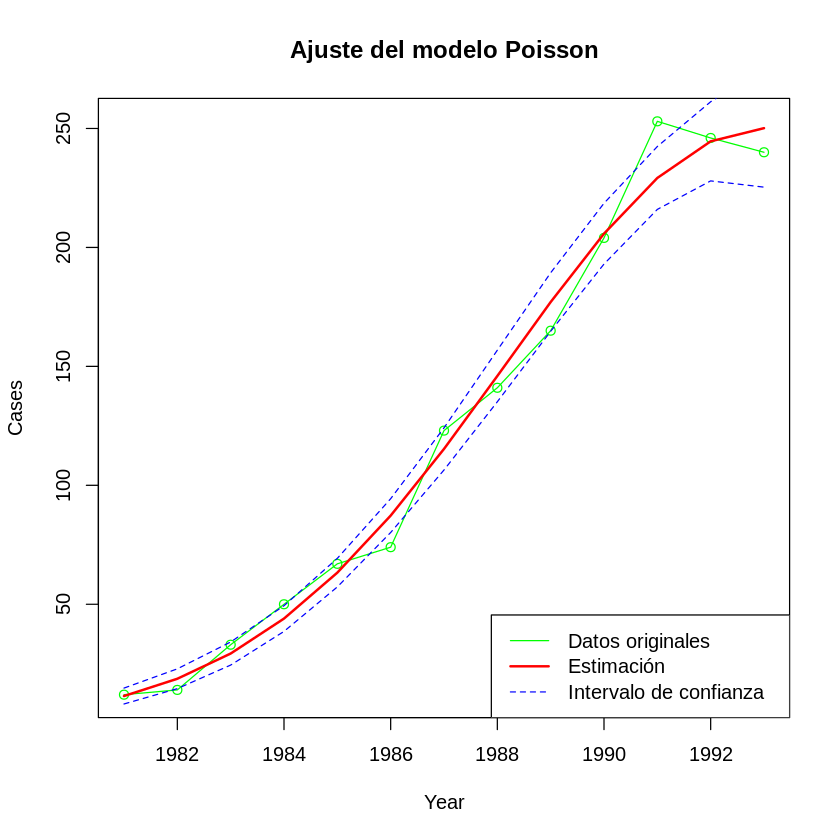

In [ ]:
pred <- predict(modelo1, type = "response", se.fit = TRUE)
ajuste <- pred$fit

# Limites del intervalo de confianza
lim_inf <- ajuste - 2 * pred$se.fit
lim_sup <- ajuste + 2 * pred$se.fit

# Graficar los datos
plot(aids$year, y, type = "o", col = "green", xlab = "Year", ylab = "Cases", main = "Ajuste del modelo Poisson")

# Graficar el modelo y las curvas de intervalo de confianza
lines(aids$year, ajuste, col = "red", lwd = 2)
lines(aids$year, lim_inf, col = "blue", lty = 2)
lines(aids$year, lim_sup, col = "blue", lty = 2)

legend("bottomright", legend = c("Datos originales", "Estimación", "Intervalo de confianza"), col = c("green", "red", "blue"), lty = c(1, 1, 2), lwd = c(1, 2, 1))

El valor de $β_1$ en el modelo de regresion Poisson representa la tasa de cambio lineal en el numero de casos de SIDA por unidad de tiempo.
Dado que el coeficiente $β_1$ es positivo (**0.556**), indica que hay un aumento en la tasa de nuevos casos de SIDA a medida que aumenta el tiempo. En este caso, un incremento unitario en el tiempo se asocia con un aumento de **0.556** en el logaritmo de nuevos casos de SIDA.